### Table of Contents

* [Housing data](#Housingdata)
* [Data Analysis](#analysis)
* [Train-Test Split](#train_test_split)
* [Feature Analysis and Extraction](#features_analysis)
* [Missing Values](#missing_values)
* [Categorical Features](#categorical_features)
* [Feature Engineering](#feature_engineering)
* [Train Models](#train_models)
* [Cross Validation](#cross_validation)
* [Hyper Prameter Optimization](#hyperparam_optimization)
* [Final Model](#final_model)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# inline plot 
%matplotlib inline  
# default figure size 
matplotlib.rcParams['figure.figsize'] = (20, 10)
# to make this notebook's output identical at every run
np.random.seed(42)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

## Housing data <a class="anchor" id="Housingdata"></a>

In [2]:
import os
import tarfile
import urllib.request
import pandas as pd


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()

In [286]:
# from scikit with part of features 
# import sklearn.datasets
# housing = sklearn.datasets.fetch_california_housing(as_frame=True)['data']

In [341]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [288]:
# # same dataset fewer, slightly different features, different naming 
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing(as_frame=True)['frame']


## Data Analysis <a class="anchor" id="analysis"></a>

In [3]:

# shuffle the dataset
from sklearn.utils import shuffle
housing = shuffle(housing)
housing.reset_index(inplace=True, drop=True)


In [4]:
housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
5,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND


In [291]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# number of distinct values per field
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [345]:
# statistics of the fields 
housing.describe()  # 25% with -121 means that 25% of the data have a value of less than -121 for the specific feature 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


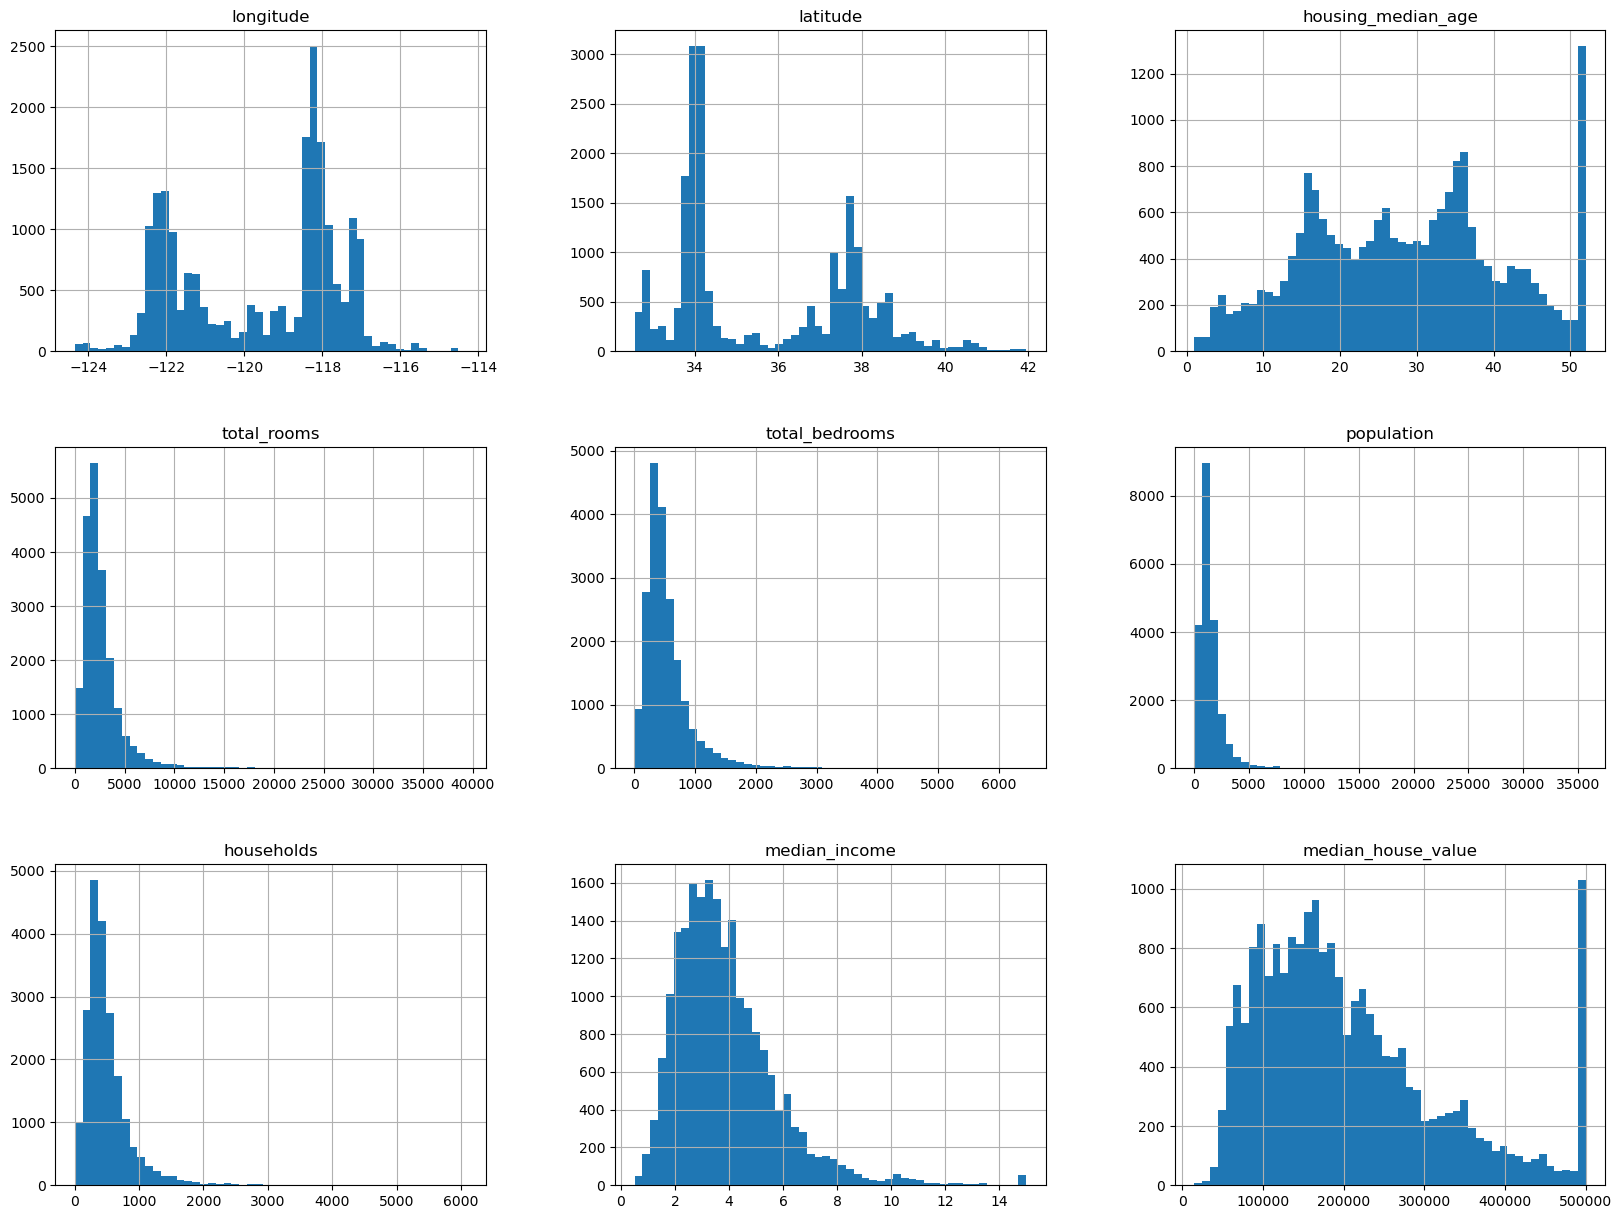

In [346]:
# plot histograms
import matplotlib.pyplot as plt
_ = housing.hist(bins=50, figsize=(20,15))


## train-test split and stratified split <a class="anchor" id="train_test_split"></a>

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'''
Train set size: {train_set.size}
Test set size: {test_set.size}
''')


Train set size: 165120
Test set size: 41280



<Axes: >

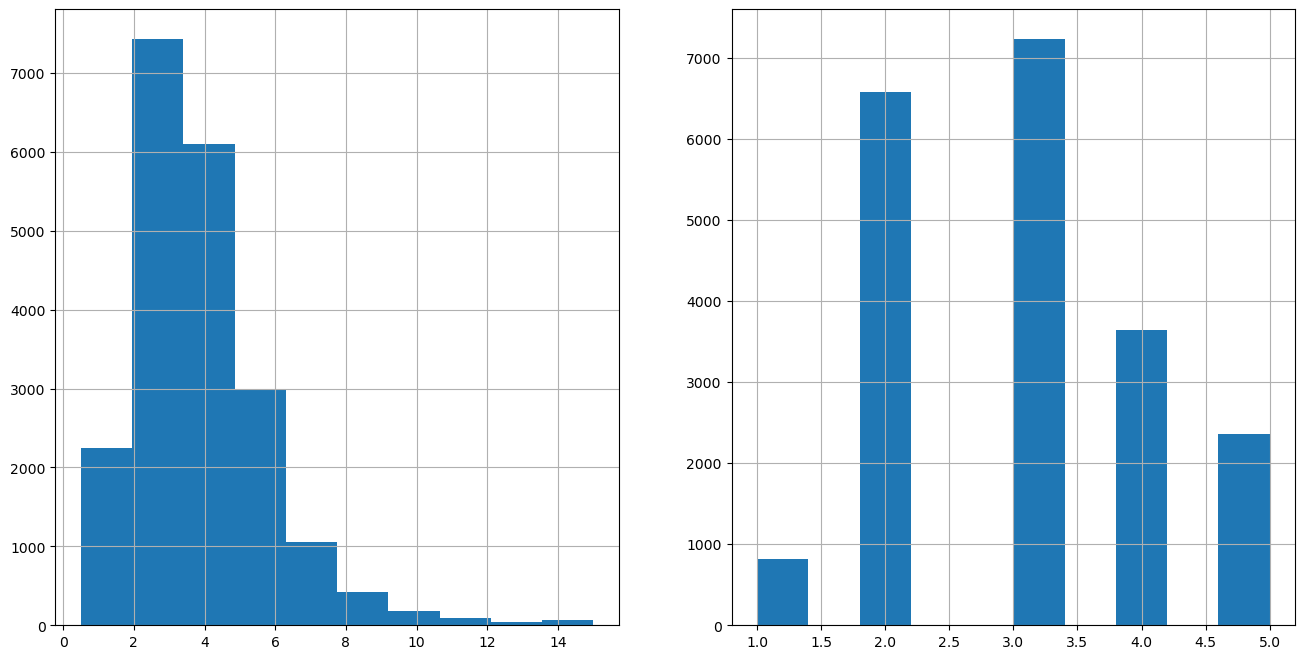

In [7]:
# Descretisizing a feature

fig, axes = plt.subplots(1,2, figsize=(16,8))
housing["median_income"].hist(ax=axes[0])
# Bin values into discrete intervals.
housing.loc[:,"income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]).copy()

housing["income_cat"].hist(ax=axes[1])



In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

# here we see the difference between a stratidfied split and 
# a random one. we see that the proportions of the labels are better preserved

# StratifiedShuffleSplit
# =======================
# This cross-validation object is a merge of StratifiedKFold and
# ShuffleSplit, which returns stratified randomized folds. The folds
# are made by preserving the percentage of samples for each class.

# split.split Generate indices to split data into training and test set.
# note that each split will maintain the proportions of the classes in train and test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# If the index is shuffled the startification does not work 
housing.reset_index(inplace=True, drop=True)

# just one loop here
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# verifying the stratification
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()


compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.311289,-2.370460,-0.015195
3,0.350581,0.350533,0.356589,1.713654,-0.013820
4,0.176308,0.176357,0.173450,-1.621325,0.027480
5,0.114438,0.114341,0.118459,3.513971,-0.084674


In [9]:
# Remove previously generated binned label
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


## Features Analysis and Extraction <a class="anchor" id="features_analysis"></a>

### Locations

<Axes: xlabel='longitude', ylabel='latitude'>

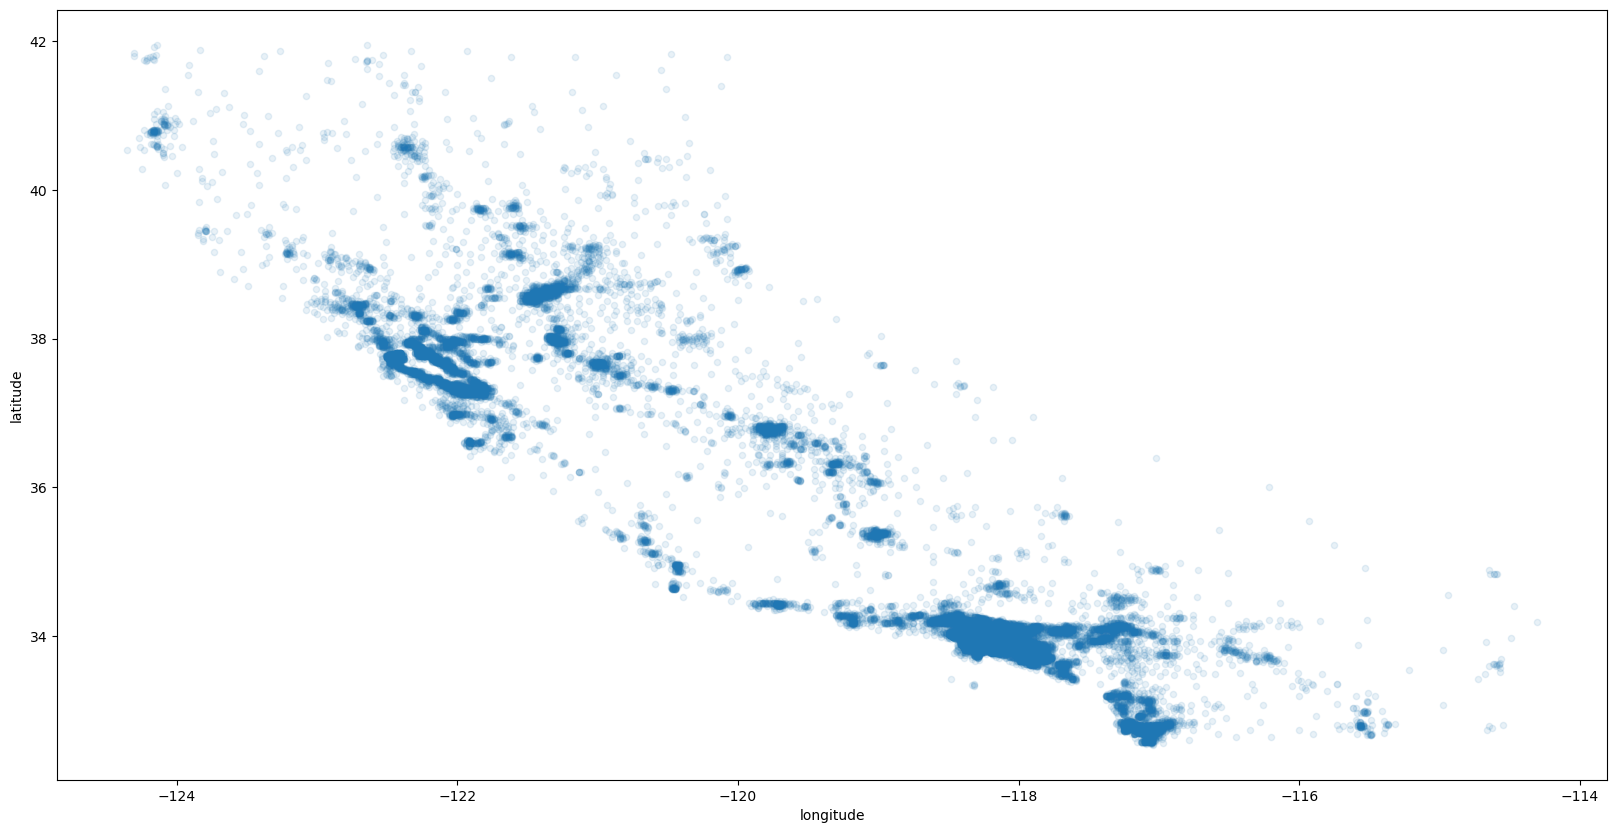

In [10]:
# view the locations 
# we use alpha=0.1 to visualize thhe density better
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


### Locations with population and median house value

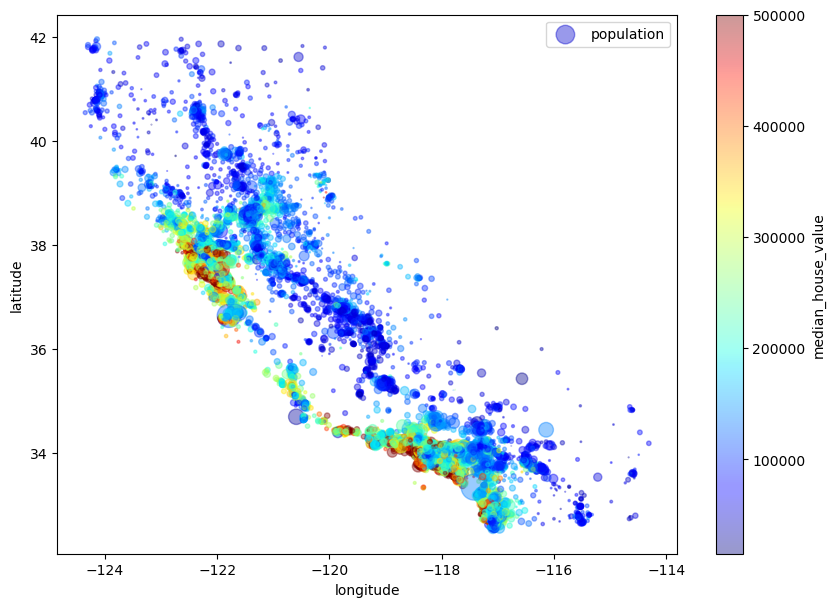

In [11]:
# another more comprehensive visualization 
# "s" = the size ot each location is set by the size if the population
# "c" = the color indicates the median_house_value 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()


## Encoding categorical features <a class="anchor" id="categorical_features"></a>

In [12]:
# Now we encode the categorical feature as numbers

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
print(housing_cat_encoded)
print(f'categories: {ordinal_encoder.categories_}')
pd.DataFrame(data=housing_cat_encoded[:10], index=housing[["ocean_proximity"]][:10])  # input: columns, index

[[1.]
 [1.]
 [3.]
 ...
 [0.]
 [0.]
 [3.]]
categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,0
"(INLAND,)",1.0
"(INLAND,)",1.0
"(NEAR BAY,)",3.0
"(<1H OCEAN,)",0.0
"(NEAR OCEAN,)",4.0
"(INLAND,)",1.0
"(<1H OCEAN,)",0.0
"(<1H OCEAN,)",0.0
"(NEAR BAY,)",3.0
"(<1H OCEAN,)",0.0


In [13]:
# onehot encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot

C:\Users\Or\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [14]:
housing.loc[:, "ocean_proximity"] = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,1.0,2
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,1.0,2
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,3.0,3
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,0.0,4
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,0.0,5
20636,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,1.0,3
20637,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,0.0,2
20638,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,0.0,4


### Correlations

In [15]:
## correlation matrix 
# min_periods: minimum number of observations required per pair of columns
# to have a valid result
corr_matrix = housing.corr(method='pearson', min_periods=1)
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750,0.643892
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000,-0.024865


In [16]:
# in the last column we see the correlation between the different features and the median 
# house value. we see that it is highly correlated with median income. Note that the values 
# indicate linear relationship, when values are low it doesn't say that the fields are independet 

corr_matrix.sort_values(by='median_house_value', key=lambda x: abs(x), ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750,0.643892
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957,0.902750
income_cat,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,-0.024865,1.000000
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974,-0.085528
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693,0.220528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468,-0.146920
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000,-0.024865
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186,0.038490
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768,0.015662
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779,-0.010690


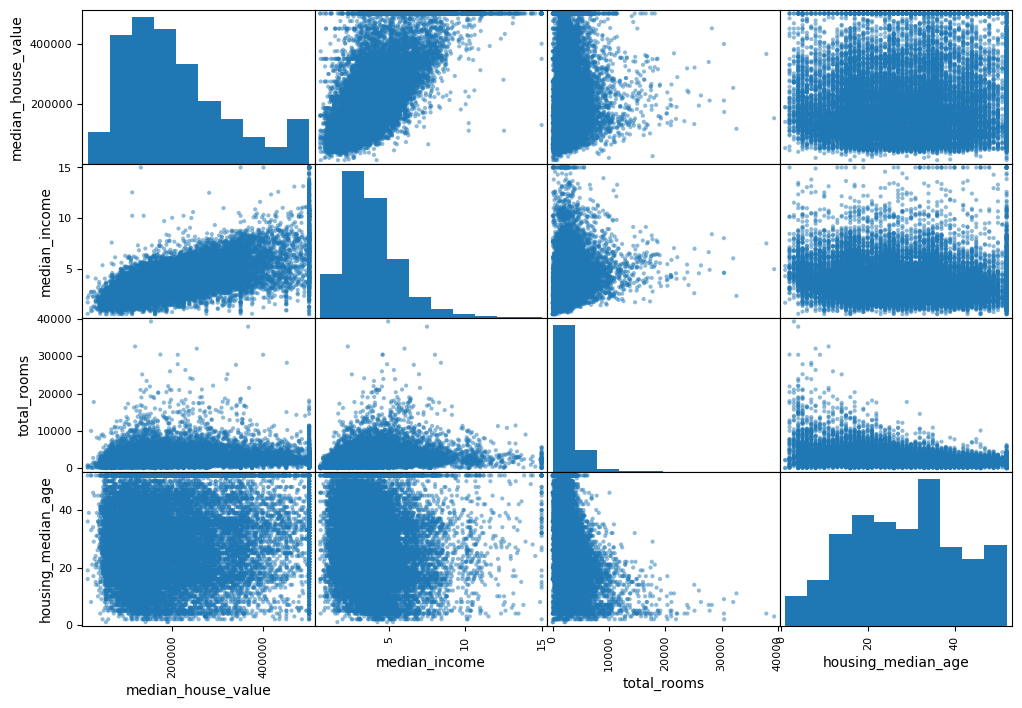

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

# a scatter visualizing densities of the pairs of selected variables
# among the ones specified. Note that on the diagonal we see histograms of the 
# values of the variables since if we would have plot a scatter, the plot was 
# the histogram drown on the diagonal, so no need for 3d representation

# we see that median income is highly correlated with median housing value

_ = scatter_matrix(housing[attributes], figsize=(12, 8))


### correlations with labels (response variable)

In [18]:
# the total_rooms, total_bedrooms are dependent on the households, total_rooms 
# we will try to define better features

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# we see that bedrooms_per_room is a great new feature (the minus sign tells us 
# the hier the ratio of bedrooms the lower the median house value 
# rooms_per_household looks nice 
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(key=lambda x: abs(x), ascending=False)


median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
bedrooms_per_room          -0.255880
rooms_per_household         0.151948
latitude                   -0.144160
total_rooms                 0.134153
housing_median_age          0.105623
ocean_proximity             0.081750
households                  0.065843
total_bedrooms              0.049686
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
Name: median_house_value, dtype: float64

## Splitting the train set into X and y

In [19]:
# split labels from features, also use the train data!
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

# housing: train with no labels
# housing_labels: train labels

## Missing values <a class="anchor" id="missing_values"></a>

In [20]:
incomplete_rows = housing[housing.isnull().any(axis=1)]
# incomplete_rows
# print(housing.isnull().any(axis=1)) # Dataframe that shows for each sample which feature is missing (True) 
# print(housing.isnull().any(axis=1)) # For each row (axis=1), check if there is at least one feature with value of True
# print(f'Number of incomplete rows: {incomplete_rows.size}')
incomplete_rows.isnull().sum(axis=0).reset_index().rename(columns={'index': 'field', 0: 'missing'})

,field,missing
0,longitude,0
1,latitude,0
2,housing_median_age,0
3,total_rooms,0
4,total_bedrooms,169
5,population,0
6,households,0
7,median_income,0
8,ocean_proximity,0


In [21]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
117,-118.50,34.17,37.0,880.0,NaN,369.0,155.0,4.1429,<1H OCEAN
175,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,INLAND
16,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY
92,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696,NEAR OCEAN
172,-117.20,33.24,12.0,4992.0,NaN,2106.0,801.0,6.2079,<1H OCEAN


In [22]:
# option 1: drop the rows 
sample_incomplete_rows.dropna(subset=["total_bedrooms"])   


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [23]:

# option 2: remove the feature 
sample_incomplete_rows.drop("total_bedrooms", axis=1)    


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
117,-118.50,34.17,37.0,880.0,369.0,155.0,4.1429,<1H OCEAN
175,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,INLAND
16,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,NEAR BAY
92,-117.14,32.71,52.0,500.0,480.0,108.0,1.8696,NEAR OCEAN
172,-117.20,33.24,12.0,4992.0,2106.0,801.0,6.2079,<1H OCEAN


In [24]:
# option 3: impute - should be very carefull with imputing data this way - it changes the 
# distribbution of values. this won't effect the model only under very specific circumstances 
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
117,-118.50,34.17,37.0,880.0,435.0,369.0,155.0,4.1429,<1H OCEAN
175,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,INLAND
16,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,NEAR BAY
92,-117.14,32.71,52.0,500.0,435.0,480.0,108.0,1.8696,NEAR OCEAN
172,-117.20,33.24,12.0,4992.0,435.0,2106.0,801.0,6.2079,<1H OCEAN


### Imputation

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
# select ony numerical features
housing_numerical_features = housing.select_dtypes(include=[np.number])
imputer.fit(housing_numerical_features)

print(f'The median per field for imputation {imputer.statistics_}')

# create a dataframe with the imputation - we want to retain the index 
# so we can access specific rows 
housing_tr = pd.DataFrame(imputer.transform(housing_numerical_features), 
                          columns=housing_numerical_features.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]


The median per field for imputation [-118.5      34.26     29.     2127.      435.     1167.      408.
    3.5313]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
117,-118.50,34.17,37.0,880.0,435.0,369.0,155.0,4.1429
175,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083
16,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063
92,-117.14,32.71,52.0,500.0,435.0,480.0,108.0,1.8696
172,-117.20,33.24,12.0,4992.0,435.0,2106.0,801.0,6.2079


## Feature engineering <a class="anchor" id="feature_engineering"></a>

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices
# print(rooms_ix, bedrooms_ix, population_ix, households_ix)

######################################
# define a new feature using sklearn #
######################################
class CombinedAttributesAdder(TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        # nothing to learn befor transforming
        return self  
    
    def transform(self, X):  # X is a numpy array
        # rooms_per_household feature
        
        rooms_per_household = np.expand_dims(X[:, rooms_ix] / X[:, households_ix], axis=1)
        # population_per_household feature
        population_per_household = np.expand_dims(X[:, population_ix] / X[:, households_ix], axis=1)
        res = [X, rooms_per_household, population_per_household]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = np.expand_dims(X[:, bedrooms_ix] / X[:, rooms_ix],1)
            res.append(bedrooms_per_room)
            
        return np.concatenate(res,axis=1)

#################################
# see that it works as expected #
#################################

attr_extractor = CombinedAttributesAdder(add_bedrooms_per_room=False)

housing_extra_attribs = pd.DataFrame(
    attr_extractor.transform(housing.values),
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12951,-119.29,36.34,10.0,1832.0,455.0,1664.0,429.0,2.0227,INLAND,4.270396,3.878788
15018,-117.93,33.66,18.0,2043.0,250.0,702.0,246.0,9.6062,<1H OCEAN,8.304878,2.853659
3584,-118.19,33.85,30.0,3533.0,1061.0,2678.0,1033.0,2.2417,NEAR OCEAN,3.420136,2.592449
14616,-119.95,38.95,8.0,430.0,107.0,36.0,18.0,2.625,INLAND,23.888889,2.0
20513,-121.89,39.76,15.0,10265.0,1860.0,4591.0,1906.0,3.07,INLAND,5.385624,2.408709


In [317]:
z = np.array([[1,2,3], [4,5,6]])
print(z.shape)
z_expanded = np.expand_dims(z[:, 0] / z[:, 0], axis=1)
print((z[:, 0] / z[:, 0]).shape)
print(z_expanded.shape)


(2, 3)
(2,)
(2, 1)


### Pipeline the transformations

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numericals_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # impute missing values
        ('attribs_adder', CombinedAttributesAdder()), # add new features
        ('std_scaler', StandardScaler()), # scale the features
    ])

# we use fit to learn the median for imputation and the mean, std for scaling
housing_num_tr = numericals_pipeline.fit_transform(housing_numerical_features)

### Combine all features together

In [30]:
from sklearn.compose import ColumnTransformer

numeric_attribs = list(housing_numerical_features)
cat_attribs = ["ocean_proximity"]

# ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame.
# This is useful for heterogeneous or columnar data, to combine several feature extraction 
# mechanisms or transformations into a single transformer.
full_pipeline = ColumnTransformer([
        # List of (name, transformer, columns) tuples specifying the
        # transformer objects to be applied to subsets of the data.

        ("numericals_pipeline", numericals_pipeline, numeric_attribs),
        ("categorical_pipeline", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

num_samples, num_features = housing_prepared.shape
print(f'''
numbber of samples {num_samples}
number of features {num_features}
''')


numbber of samples 16512
number of features 16



## Train models <a class="anchor" id="train_models"></a>

here we try out 3 different estimators (models) and calculate the train error for each 

In [35]:
from sklearn.metrics import mean_squared_error


#######################
#  Linear regression  #    
#######################
from sklearn.linear_model import LinearRegression
# Define
lin_reg = LinearRegression()
# train 
lin_reg.fit(housing_prepared, housing_labels)
# predict on training data 
housing_predictions = lin_reg.predict(housing_prepared)
# RMSE metric
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(f'Linear Regression train error {lin_rmse}')

#######################
#    Decision tree    #
#######################
from sklearn.tree import DecisionTreeRegressor

# Define
tree_reg = DecisionTreeRegressor(random_state=42)
# train
tree_reg.fit(housing_prepared, housing_labels)
# predict on training data 
housing_predictions = tree_reg.predict(housing_prepared)
# RMSE metric
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(f'Regression Tree train error {tree_rmse}')

###################
#  Random Forest  #
###################
from sklearn.ensemble import RandomForestRegressor
# Define
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# train
forest_reg.fit(housing_prepared, housing_labels)
# predict on training data 
housing_predictions = forest_reg.predict(housing_prepared)
# RMSE metric
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(f'Random Forest train error {forest_rmse}')

Linear Regression train error 68367.84807187697
Regression Tree train error 0.0
Random Forest train error 18730.177568322844


## Cross-Validation  <a class="anchor" id="cross_validation"></a>

In [321]:

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

for estimator in [lin_reg, tree_reg, forest_reg]:
    # returns an array of scores of the estimator for each run of the cross validation.
    scores = cross_val_score(estimator=estimator, X=housing_prepared, y=housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
    model_type = estimator.__class__.__name__
    rmse_scores = np.sqrt(-scores)
    print(f'model type: {model_type}')
    print('=========================')
    display_scores(rmse_scores)
    print('-------------------------')
    



model type: LinearRegression
Scores: [66389.04855567 68313.93086809 69478.21691022 71239.39956035
 71978.95762647 70166.79324515 69932.21470717 65514.91855094
 67437.84333266 67104.30720294]
Mean: 68755.56305596519
Standard deviation: 2030.228128183192
-------------------------
model type: DecisionTreeRegressor
Scores: [71449.02279521 73667.34871536 70953.96859342 68139.2639063
 70214.39055043 69161.11279728 69830.12277785 69356.68784568
 69997.20990836 69595.8191091 ]
Mean: 70236.49469990164
Standard deviation: 1439.374341184362
-------------------------
model type: RandomForestRegressor
Scores: [49727.83497346 51322.61411545 52862.88970662 47749.33063348
 52889.30789552 49752.75055213 51515.62235447 48248.57755459
 50494.86391978 50160.1025376 ]
Mean: 50472.389424309
Standard deviation: 1640.05675260301
-------------------------


In [322]:
# random forest seems the most promising 

## Hyper Parameter Optimization <a class="anchor" id="hyperparam_optimization"></a>

### Grid Search

In [323]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
# return train score
# Computing training scores is used to get insights on how different
# parameter settings impact the overfitting/underfitting trade-off.
# However computing the scores on the training set can be computationally
# expensive and is not strictly required to select the parameters that
# yield the best generalization performance.

grid_search = GridSearchCV(
    estimator=forest_reg, 
    param_grid=param_grid, 
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [324]:
print(f'''
best params: {grid_search.best_params_}
best estimator: {grid_search.best_estimator_}
''')



best params: {'max_features': 8, 'n_estimators': 30}
best estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)



In [325]:
# we expect to see 18 rows - one for each HP combination
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results['rmse_score'] = np.sqrt(-grid_results.mean_test_score)
grid_results.sort_values(by='rmse_score', ascending=True)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,rmse_score
11,5.779201,0.028019,0.024934,3.504023e-07,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.538657e+09,-2.500880e+09,...,6.417203e+07,1,-3.755421e+08,-3.797113e+08,-3.722750e+08,-3.740186e+08,-3.743439e+08,-3.751782e+08,2.496025e+06,49966.416209
8,4.531798,0.044753,0.025041,4.783987e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.573872e+09,-2.511930e+09,...,6.320777e+07,2,-3.814908e+08,-3.834546e+08,-3.784373e+08,-3.819803e+08,-3.852782e+08,-3.821283e+08,2.268589e+06,50223.261216
5,3.115421,0.019747,0.024724,3.966212e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.602381e+09,-2.574748e+09,...,7.334028e+07,3,-3.852007e+08,-3.965251e+08,-3.817144e+08,-3.825032e+08,-3.818515e+08,-3.855590e+08,5.625803e+06,50365.508217
17,1.329300,0.012570,0.009967,1.370971e-05,4,10,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.723296e+09,-2.656321e+09,...,8.187331e+07,4,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,51202.268128
7,1.732579,0.412639,0.011767,4.653294e-03,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.751431e+09,-2.659447e+09,...,8.070735e+07,5,-4.900050e+08,-4.989424e+08,-4.940317e+08,-5.021121e+08,-4.963578e+08,-4.962898e+08,4.136136e+06,51938.376012
10,1.918909,0.015817,0.008981,8.312025e-06,8,10,NaN,"{'max_features': 8, 'n_estimators': 10}",-2.785990e+09,-2.669191e+09,...,8.135970e+07,6,-5.031593e+08,-4.884334e+08,-4.989601e+08,-4.902022e+08,-5.001583e+08,-4.961827e+08,5.796746e+06,52239.888282
4,1.038848,0.004365,0.009021,7.469005e-05,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.818219e+09,-2.811059e+09,...,1.156156e+08,7,-5.066593e+08,-5.136112e+08,-5.225906e+08,-5.103031e+08,-4.982478e+08,-5.102824e+08,8.006635e+06,52473.375087
15,1.044752,0.010402,0.009974,1.512408e-06,3,10,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-2.912332e+09,-2.791989e+09,...,9.702815e+07,8,-0.000000e+00,-0.000000e+00,-9.462528e+02,-4.738834e+00,-0.000000e+00,-1.901983e+02,3.780317e+02,52888.978685
2,1.845654,0.019987,0.025227,8.789304e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.860849e+09,-2.823098e+09,...,3.421050e+07,9,-4.394041e+08,-4.240459e+08,-4.266370e+08,-4.337805e+08,-4.308347e+08,-4.309405e+08,5.399348e+06,53054.934495
13,0.792533,0.011382,0.010572,4.884804e-04,2,10,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-3.132228e+09,-3.141120e+09,...,1.345156e+08,10,-1.424635e+02,-2.404573e+02,-3.785011e-01,-0.000000e+00,-3.785011e+03,-8.336621e+02,1.478477e+03,54705.091667


### Random Search

In [326]:
# Random hyper parameters search 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200), # defines a uniform discrete random variable to sample from 
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(
    estimator=forest_reg, 
    param_distributions=param_distribs,             # the parameter space to sample from (either rv or a list to sample from)
    n_iter=10,                                      # Number of parameter settings that are sampled
    cv=5,                                           # to specify the number of folds in a `(Stratified)KFold`
    scoring='neg_mean_squared_error',               # the scoring function
    random_state=42)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023D7DBE4C50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023D3D1079D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [48]:
# sampling two values from the discrete RV
param_distribs['n_estimators'].rvs(2)

array([128,  45], dtype=int64)

In [328]:
rnd_results = pd.DataFrame(rnd_search.cv_results_)[['mean_test_score', 'params']]
rnd_results['rmse_score'] = np.sqrt(-rnd_results.mean_test_score)
rnd_results.sort_values(by='rmse_score', ascending=True)

,mean_test_score,params,rmse_score
0,-2.418298e+09,"{'max_features': 7, 'n_estimators': 180}",49176.193790
4,-2.438644e+09,"{'max_features': 7, 'n_estimators': 122}",49382.627039
7,-2.446602e+09,"{'max_features': 5, 'n_estimators': 100}",49463.137048
8,-2.543887e+09,"{'max_features': 3, 'n_estimators': 150}",50436.963945
6,-2.557372e+09,"{'max_features': 3, 'n_estimators': 88}",50570.461274
2,-2.577051e+09,"{'max_features': 3, 'n_estimators': 72}",50764.667734
5,-2.577483e+09,"{'max_features': 3, 'n_estimators': 75}",50768.916117
3,-2.583616e+09,"{'max_features': 5, 'n_estimators': 21}",50829.285206
1,-2.650950e+09,"{'max_features': 5, 'n_estimators': 15}",51487.373872
9,-4.191090e+09,"{'max_features': 5, 'n_estimators': 2}",64738.625068


In [329]:
# get the best estimator 
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

## Final model pipeline <a class="anchor" id="final_model"></a>

In [330]:

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# using the feature extraction and the model explicitely 
# X_test_prepared = full_pipeline.transform(X_test)
# final_predictions = final_model.predict(X_test_prepared)

# setting them in a pipeline
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("rf_model", final_model)
])
final_predictions = full_pipeline_with_predictor.predict(X_test)


final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(f''' final RMSE {final_rmse} ''')


 final RMSE 47588.64300685496 


In [331]:
# save the model

import joblib
joblib.dump(value=full_pipeline_with_predictor, filename="my_model.pkl") 
my_model_loaded = joblib.load("my_model.pkl") 


In [332]:
# full_pipeline_with_predictor['preparation'].named_transformers_
full_pipeline_with_predictor

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('numericals_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   <__main__.CombinedAttributesAdder object at 0x0000023D7B1BFB90>),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('categorical_pipeline',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('rf_model',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))])

### Features importance for Random forest 

In [333]:
# get categorical features (each category is a feature)
cat_encoder = full_pipeline_with_predictor['preparation'].named_transformers_['categorical_pipeline']
cat_one_hot_attribs = list(cat_encoder.categories_[0]) # ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]

# add to numeric and extra features
attributes = numeric_attribs + extra_attribs + cat_one_hot_attribs

rf_model = full_pipeline_with_predictor['rf_model']
pd.DataFrame(zip(attributes, rf_model.feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)


,feature,importance
7,median_income,0.366235
12,INLAND,0.170331
9,population_per_household,0.107053
0,longitude,0.074927
8,rooms_per_household,0.062019
1,latitude,0.061010
10,bedrooms_per_room,0.048595
2,housing_median_age,0.039462
5,population,0.015803
3,total_rooms,0.015679


In [334]:
## Confidence interval for the RMSE score

In [335]:
from scipy import stats

confidence = 0.95
# take the square errors 
squared_errors = (final_predictions - y_test) ** 2
# the average is t-distributed (unknown variance)
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1, # degrees of freedom
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45522.42614668, 49568.80676583])

In [336]:
# or just assume normality :) which is ok for high enough dof
mean = squared_errors.mean()

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(len(squared_errors))
# print(f'Confidence interval: [{np.sqrt(mean - zmargin)}, {np.sqrt(mean + zmargin)}]')
print("Confidence interval:")
print(f"Low: {np.sqrt(mean - zmargin)}")
print(f"High: {np.sqrt(mean + zmargin)}")
              
              


Confidence interval:
Low: 45523.045870896785
High: 49568.237623542744


## pandas profiler <a class="anchor" id="pandas_profiler"></a>

In [ ]:
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df=housing, title="Housing Data Report", explorative=True)

In [ ]:
# profile.to_notebook_iframe()

In [373]:
# the installation take few minutes - 
# it is recommended running it on a clean notebook with only pandas imported and the dataset read.
# when using matplotlib inline there could be some problems and errors

# !pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [374]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df=housing, title="Housing Data Report", explorative=True)

In [376]:
# profile